<a href="https://colab.research.google.com/github/Vsanku01/Deep-Learning-Tuts/blob/master/Simple_RNN(Sine_Wave_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
import tensorflow
print(tensorflow.__version__)

2.1.0


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [0]:
x = np.linspace(0,50,501)

In [0]:
# x

In [0]:
y = np.sin(x)

In [0]:
# y

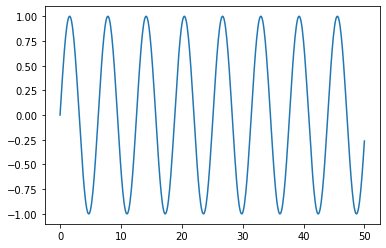

In [8]:
plt.plot(x,y)

In [0]:
df = pd.DataFrame(data=y,index=x,columns=['Sine'])

In [10]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


#Train,Test Split

In [11]:
len(df)

501

In [0]:
test_pecent = 0.1 # 10 percent of data


In [13]:
len(df)*test_pecent


50.1

In [0]:
test_point = np.round(len(df)*test_pecent)

In [15]:
test_point

50.0

In [0]:
test_index = int(len(df) - test_point)

In [17]:
test_index

451

In [0]:
train = df.iloc[:test_index]

In [0]:
test = df.iloc[test_index:]

In [20]:
train

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208


In [21]:
test

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

In [24]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

#Batch Generator

In [0]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator # Generates batches for sequence data

In [0]:
length =  25# length of the output sequences
batch_size = 1


generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=batch_size)

In [28]:
len(scaled_train)

451

In [29]:
len(generator)

426

In [0]:
X, y = generator[0]

In [31]:
X # length

array([[[0.49999912],
        [0.54991622],
        [0.59933458],
        [0.64776041],
        [0.69470985],
        [0.73971381],
        [0.78232262],
        [0.82211054],
        [0.85868004],
        [0.89166571],
        [0.92073798],
        [0.94560637],
        [0.9660224 ],
        [0.98178208],
        [0.99272794],
        [0.99875061],
        [0.99978993],
        [0.9958355 ],
        [0.98692684],
        [0.97315296],
        [0.95465148],
        [0.93160726],
        [0.90425056],
        [0.87285471],
        [0.83773342]]])

In [32]:
y # batch_size

array([[0.79923759]])

In [0]:
length =  50 # length of the output sequences, select valus such that atleast on cycle is selected
batch_size = 1


generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=batch_size)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM


n_features = 1

model = Sequential()

model.add(SimpleRNN(50,input_shape = (length , n_features)))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse',metrics = ['accuracy'])



In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit_generator(generator=generator,epochs=20)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 401 steps
Epoch 1/20
401/401 [==============================] - 19s 47ms/step - loss: 0.0042 - accuracy: 0.0050
Epoch 2/20
401/401 [==============================] - 17s 41ms/step - loss: 4.3691e-05 - accuracy: 0.0050
Epoch 3/20
401/401 [==============================] - 17s 41ms/step - loss: 2.7096e-04 - accuracy: 0.0050
Epoch 4/20
401/401 [==============================] - 16s 41ms/step - loss: 7.8657e-05 - accuracy: 0.0050
Epoch 5/20
401/401 [==============================] - 16s 39ms/step - loss: 2.1153e-04 - accuracy: 0.0050
Epoch 6/20
401/401 [==============================] - 17s 41ms/step - loss: 1.5045e-04 - accuracy: 0.0050
Epoch 7/20
401/401 [==============================] - 16s 40ms/step - loss: 5.9360e-05 - accuracy: 0.0050
Epoch 8/20
401/401 [==============================] - 16s 39ms/step - loss: 9.7987e-05 - accuracy: 0.0050
Epoch 9/20
401/401 [===============

In [0]:
losses = pd.DataFrame(model.history.history)

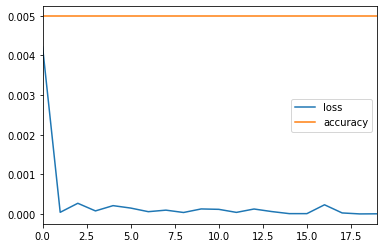

In [38]:
losses.plot()

#Evaluation

In [0]:
first_eval_batch = scaled_train[-length:] # Take the last 50 points and predict the new value in the scaled_test

In [0]:
first_eval_batch = first_eval_batch.reshape((1,length,n_features)) # shape to the model expects

In [41]:
model.predict(first_eval_batch)

array([[0.92780817]], dtype=float32)

In [42]:
scaled_test[0]

array([0.94955134])

In [0]:
test_predictions = []

first_eval_batch = scaled_train[-length:]

current_batch = first_eval_batch.reshape(1,length,n_features) # we will predict the new point and add it to the eval_batch removing the first point from the eval batch

In [0]:
# predicted_val = [[[99]]]
# np.append(current_batch[:,1:,:],predicted_val,axis = 1)

In [0]:
test_predictions = []

first_eval_batch = scaled_train[-length:]

current_batch = first_eval_batch.reshape(1,length,n_features)


for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]

  test_predictions.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis = 1)

In [46]:
test_predictions

[array([0.92780817], dtype=float32),
 array([0.9369301], dtype=float32),
 array([0.9309469], dtype=float32),
 array([0.91730654], dtype=float32),
 array([0.89278555], dtype=float32),
 array([0.8568478], dtype=float32),
 array([0.8207543], dtype=float32),
 array([0.77112174], dtype=float32),
 array([0.72024363], dtype=float32),
 array([0.6629103], dtype=float32),
 array([0.59980273], dtype=float32),
 array([0.5399562], dtype=float32),
 array([0.4734027], dtype=float32),
 array([0.40834963], dtype=float32),
 array([0.34344333], dtype=float32),
 array([0.27846375], dtype=float32),
 array([0.21959585], dtype=float32),
 array([0.15795146], dtype=float32),
 array([0.10384689], dtype=float32),
 array([0.05243206], dtype=float32),
 array([0.00558158], dtype=float32),
 array([-0.03298601], dtype=float32),
 array([-0.07137896], dtype=float32),
 array([-0.09927446], dtype=float32),
 array([-0.12517248], dtype=float32),
 array([-0.14392759], dtype=float32),
 array([-0.15637766], dtype=float32),
 a

In [47]:
scaled_test

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


In [0]:
true_predictions = scaler.inverse_transform(test_predictions)

In [49]:
test['Predictions'] = true_predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
test

,Sine,Predictions
45.1,0.899097,0.855611
45.2,0.938307,0.873855
45.3,0.968142,0.861889
45.4,0.988304,0.834608
45.5,0.998591,0.785567
45.6,0.998900,0.713692
45.7,0.989229,0.641505
45.8,0.969673,0.542241
45.9,0.940429,0.440485
46.0,0.901788,0.325820


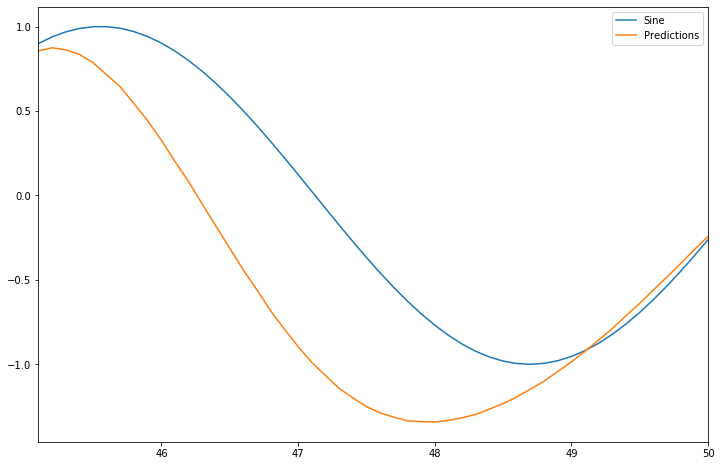

In [51]:
test.plot(figsize = (12,8))

#LSTM

In [55]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)
length = 49
batch_size = 1

generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=batch_size)

validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=batch_size)

model = Sequential()

model.add(LSTM(50,input_shape=(length,n_features)))

model.add(Dense(1))

model.compile(optimizer = 'adam',loss='mse',metrics=['accuracy'])

model.fit_generator(generator,epochs=20,validation_data=validation_generator,callbacks=[early_stop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 402 steps, validate for 1 steps
Epoch 1/20
402/402 [==============================] - 5s 13ms/step - loss: 0.0202 - accuracy: 0.0050 - val_loss: 7.1921e-05 - val_accuracy: 0.0000e+00
Epoch 2/20
402/402 [==============================] - 4s 9ms/step - loss: 1.3616e-04 - accuracy: 0.0050 - val_loss: 1.6622e-04 - val_accuracy: 0.0000e+00
Epoch 3/20
402/402 [==============================] - 4s 9ms/step - loss: 1.7835e-04 - accuracy: 0.0050 - val_loss: 3.2666e-05 - val_accuracy: 0.0000e+00
Epoch 4/20
402/402 [==============================] - 4s 9ms/step - loss: 3.7512e-04 - accuracy: 0.0050 - val_loss: 2.3507e-05 - val_accuracy: 0.0000e+00
Epoch 5/20
402/402 [==============================] - 4s 9ms/step - loss: 5.7782e-04 - accuracy: 0.0050 - val_loss: 1.0463e-05 - val_accuracy: 0.0000e+00
Epoch 6/20
402/402 [==============================] - 4s 9ms/step - loss: 1.1012e-04 - accuracy: 0.0050 - val_loss: 6.5155e-06 - val_accuracy

In [0]:
test_predictions = []

first_eval_batch = scaled_train[-length:]

current_batch = first_eval_batch.reshape(1,length,n_features)


for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]

  test_predictions.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis = 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


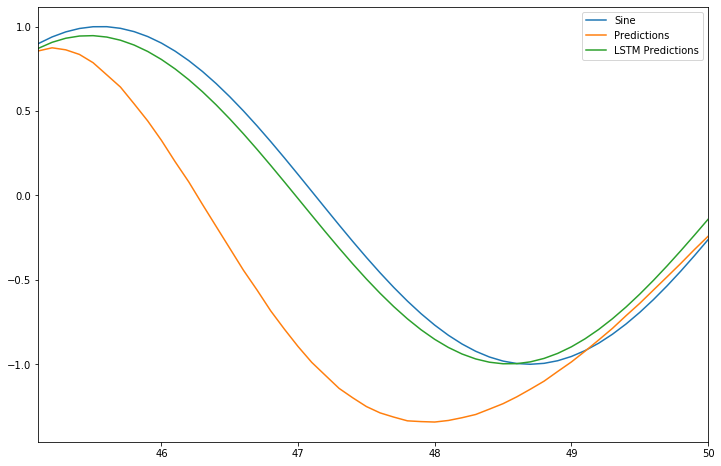

In [57]:
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM Predictions'] = true_predictions
test.plot(figsize=(12,8))

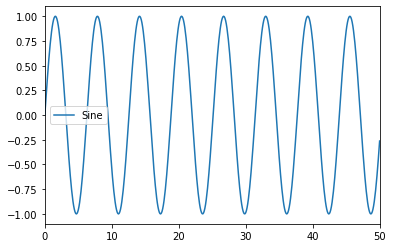

In [58]:
df.plot()

#Forecasting

In [0]:
full_scaler = MinMaxScaler()

scaled_full_data = full_scaler.fit_transform(df)

In [0]:
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data,length=length,batch_size=batch_size)

In [0]:
model = Sequential()

model.add(LSTM(50,input_shape=(length,n_features)))

model.add(Dense(1))

model.compile(optimizer = 'adam',loss='mse',metrics=['accuracy'])


In [62]:
model.fit_generator(generator=generator,epochs=8)

  ...
    to  
  ['...']
Train for 452 steps
Epoch 1/8
452/452 [==============================] - 5s 12ms/step - loss: 0.0085 - accuracy: 0.0044
Epoch 2/8
452/452 [==============================] - 4s 9ms/step - loss: 2.0086e-04 - accuracy: 0.0044
Epoch 3/8
452/452 [==============================] - 4s 9ms/step - loss: 5.3068e-04 - accuracy: 0.0044
Epoch 4/8
452/452 [==============================] - 4s 9ms/step - loss: 5.5756e-05 - accuracy: 0.0044
Epoch 5/8
452/452 [==============================] - 4s 9ms/step - loss: 8.7770e-05 - accuracy: 0.0044
Epoch 6/8
452/452 [==============================] - 4s 9ms/step - loss: 8.3008e-05 - accuracy: 0.0044
Epoch 7/8
452/452 [==============================] - 4s 9ms/step - loss: 2.4011e-04 - accuracy: 0.0044
Epoch 8/8
452/452 [==============================] - 4s 9ms/step - loss: 9.6247e-05 - accuracy: 0.0044


In [0]:
forecast = []

first_eval_batch = scaled_train[-length:]

current_batch = first_eval_batch.reshape(1,length,n_features)


for i in range(80):
  current_pred = model.predict(current_batch)[0]

  forecast.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis = 1)

In [64]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [0]:
forecast = scaler.inverse_transform(forecast)

In [66]:
forecast

array([[ 0.93014982],
       [ 0.98155579],
       [ 1.02627346],
       [ 1.06386914],
       [ 1.09407367],
       [ 1.11672016],
       [ 1.13173826],
       [ 1.13914253],
       [ 1.13902642],
       [ 1.13155087],
       [ 1.11693497],
       [ 1.09544648],
       [ 1.0673927 ],
       [ 1.03311125],
       [ 0.99296403],
       [ 0.9473306 ],
       [ 0.89660531],
       [ 0.84119322],
       [ 0.78150728],
       [ 0.71797043],
       [ 0.65101278],
       [ 0.58107349],
       [ 0.50860174],
       [ 0.43405647],
       [ 0.35790786],
       [ 0.28063797],
       [ 0.20273938],
       [ 0.12471705],
       [ 0.04708548],
       [-0.02963128],
       [-0.1049018 ],
       [-0.17818888],
       [-0.24895184],
       [-0.31664948],
       [-0.3807444 ],
       [-0.44070721],
       [-0.49602351],
       [-0.54620244],
       [-0.59078531],
       [-0.62935693],
       [-0.66155656],
       [-0.6870875 ],
       [-0.70572634],
       [-0.71732853],
       [-0.72183157],
       [-0

In [75]:
80 * 0.1

8.0

In [0]:
forecast_index = np.arange(50.1,58.1,step=0.1)

In [77]:
len(forecast_index)

80

In [78]:
len(forecast)

80

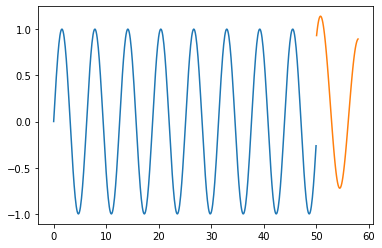

In [80]:
plt.plot(df.index,df['Sine'])
plt.plot(forecast_index,forecast)